<a href="https://colab.research.google.com/github/shareefat/machine-learning-/blob/main/k_mean_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/Mall_Customers_2.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

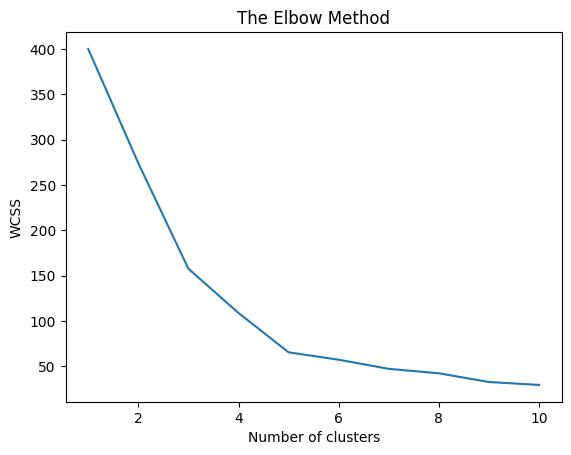

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
km=KMeans(n_clusters=5)
km.fit(x)

KMeans(n_clusters=5)

In [18]:
y=km.predict(x)

In [19]:
df['label']=y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


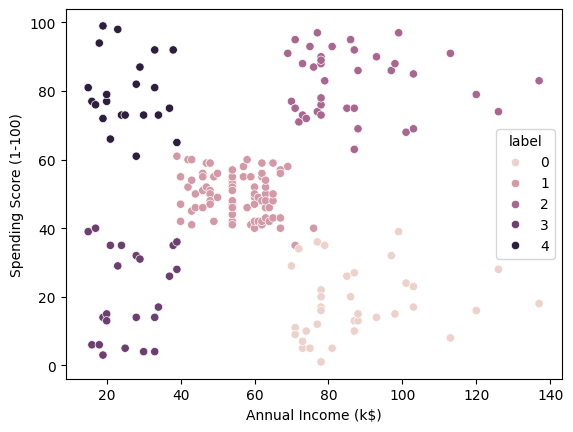

In [24]:
import seaborn as sns
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='label',data=df)   #hue is for legend
plt.show()

In [26]:
data_point=[32,25]
data_point=scaler.transform([data_point])
data_point

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.0901189 , -0.97830333]])

In [27]:
km.predict(data_point)

array([3], dtype=int32)

In [28]:
new_data=[86,80]
new_data=scaler.transform([new_data])
new_data

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.97103028, 1.15688251]])

In [29]:
km.predict(new_data)

array([2], dtype=int32)

In [32]:
point=[140,20]
point=scaler.transform([point])
point

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 3.03217945, -1.17241113]])

In [33]:
km.predict(point)

array([0], dtype=int32)

**DISADVANTAGE OF KMEANS**

it is not suitable for very large dataset

it need to give the clusters manualy